In [57]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import math
from sklearn.cross_validation import KFold
%matplotlib inline

In [58]:
iris = datasets.load_iris()

In [59]:
y = iris['target']
Y = y[:100] #two classes
x = iris['data']
X = x[:100]

In [60]:
X = np.array(X) #Data
Y = np.array(Y) #labels

In [61]:
count = [0,0]
for i in Y:
    if i == 0:
        count[0] = count[0]+1
    if i == 1:
        count[1] = count[1]+1

In [62]:
alpha = [] #no. of examples in a class/in the two classes chosen
for i in count:
    alpha.append(i * 1.0 / len(Y))

In [63]:
print alpha

[0.5, 0.5]


In [64]:
#We must segregate the data based on the classes.
class0 = []
class1 = []

for i in range(len(Y)):
    if Y[i] == 0:
        class0.append(X[i])
    elif Y[i]==1:
        class1.append(X[i])
        
#Data segregation complete.
class0 = np.array(class0)
class1 = np.array(class1)

In [65]:
mean_set1 = np.mean(class0, axis = 0) #along the columns
print mean_set1

[ 5.006  3.418  1.464  0.244]


In [66]:
mean_set2 = np.mean(class1, axis = 0) #along the columns
print mean_set2

[ 5.936  2.77   4.26   1.326]


In [67]:
tempClass0 = []
for i in range(len(class0)):
    tempClass0.append(class0[i] - mean_set1)

In [68]:
tempClass1 = []
for i in range(len(class1)):
    tempClass1.append(class1[i] - mean_set2)

In [69]:
tempClass0 = np.array(tempClass0)
tempClass1 = np.array(tempClass1)

In [70]:
sigma0 = np.dot(tempClass0.transpose(),tempClass0)/(1.0*len(tempClass0))
print sigma0

[[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]]


In [71]:
sigma1 = np.dot(tempClass1.transpose(), tempClass1)/(1.0*len(tempClass1))
print sigma1

[[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]]


In [72]:
#Membership function for covariance matrix 1. (sigma1)
mem1 = []
for i in X:
    determinant1 = np.linalg.det(sigma0)
    var1 = np.dot((i-mean_set1).transpose(),np.linalg.inv(sigma0))
    var2 = np.dot(var1,(i-mean_set1))
    fin1 = math.log(alpha[0])-(math.log(determinant1))/float(2)- (var2)/float(2)
    mem1.append(fin1)

mem2 = []
for i in X:
    determinant2 = np.linalg.det(sigma1)
    var3 = np.dot((i-mean_set2).transpose(),np.linalg.inv(sigma1))
    var4 = np.dot(var3,(i-mean_set2))
    fin2 = math.log(alpha[1])-(math.log(determinant2))/float(2)- (var4)/float(2)
    mem2.append(fin2)

In [73]:
predict =[]
for i,j in zip(mem1,mem2):
    #print i,j
    if i>j:
        predict.append(0)
    else: predict.append(1)
#predict

In [74]:
kf = KFold(len(Y), n_folds=10, shuffle = True)
cm_fold = []

In [75]:
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    count_tr = [0,0]
    for i in Y_train:
        if i == 0:
            count_tr[0] = count_tr[0]+1
        if i == 1:
            count_tr[1] = count_tr[1]+1
    
    alpha_tr = [] 
    for i in count_tr:
        alpha_tr.append(i * 1.0 / len(Y_train))
    
    class_tr0 = []
    class_tr1 = []
    for i in range(len(Y_train)):
        if Y_train[i] == 0:
            class_tr0.append(X_train[i])
        elif Y_train[i]==1:
            class_tr1.append(X_train[i])
    class_tr0 = np.array(class_tr0)
    class_tr1 = np.array(class_tr1)
    
    mean_set_tr0 = np.mean(class_tr0, axis = 0)
    mean_set_tr1 = np.mean(class_tr0, axis = 0)
    
    tempClass_tr0 = []
    for i in range(len(class_tr0)):
        tempClass_tr0.append(class_tr0[i] - mean_set_tr0)
    tempClass_tr1 = []
    for i in range(len(class_tr1)):
        tempClass_tr1.append(class_tr1[i] - mean_set_tr1)
    
    tempClass_tr0 = np.array(tempClass_tr0)
    tempClass_tr1 = np.array(tempClass_tr1)
    
    sigma_tr0 = np.dot(tempClass_tr0.transpose(),tempClass_tr0)/(1.0*len(tempClass_tr0))
    sigma_tr1 = np.dot(tempClass_tr1.transpose(),tempClass_tr1)/(1.0*len(tempClass_tr1))
    
    mem1_tr = []
    for i in X_test:
        determinant1_tr = np.linalg.det(sigma_tr0)
        var1_tr = np.dot((i-mean_set_tr0).transpose(),np.linalg.inv(sigma_tr0))
        var2_tr = np.dot(var1_tr,(i-mean_set_tr0))
        fin1_tr = math.log(alpha_tr[0])-(math.log(determinant1_tr))/float(2)- (var2_tr)/float(2)
        mem1_tr.append(fin1_tr)
    
    mem2_tr = []
    for i in X_test:
        determinant2_tr = np.linalg.det(sigma_tr1)
        var3_tr = np.dot((i-mean_set_tr1).transpose(),np.linalg.inv(sigma_tr1))
        var4_tr = np.dot(var3_tr,(i-mean_set_tr1))
        fin2_tr = math.log(alpha_tr[1])-(math.log(determinant2_tr))/float(2)- (var4_tr)/float(2)
        mem2_tr.append(fin2_tr)
        
    predict_tr =[]
    for i,j in zip(mem1_tr,mem2_tr):
        #print i,j
        if i>j:
            predict_tr.append(0)
        else: predict_tr.append(1)
    
    clabels = [0,1]
    cm_ts= []
    for i in clabels:
        tmp1 =[0]*len(clabels)
        for j in range(len(Y_test)):
            #print j
            if Y_test[j] == i and Y_test[j] == predict_tr[j]:
                tmp1[clabels.index(i)] += 1
            elif Y_test[j] == i and Y_test[j] != predict_tr[j]:
                tmp1[clabels.index(predict_tr[j])] += 1
        cm_ts.append(tmp1)   
    cm_fold.append(cm_ts)

In [76]:
cm_fold = np.array(cm_fold)
print cm_fold

[[[6 0]
  [0 4]]

 [[5 1]
  [0 4]]

 [[5 2]
  [0 3]]

 [[2 2]
  [0 6]]

 [[3 0]
  [0 7]]

 [[4 0]
  [0 6]]

 [[5 0]
  [0 5]]

 [[6 0]
  [0 4]]

 [[2 0]
  [0 8]]

 [[7 0]
  [0 3]]]


In [77]:
#cm_ts

In [78]:
cm= []
for i in clabels:
    tmp =[0]*len(clabels)
    for j in range(len(Y)):
        #print j
        if Y[j] == i and Y[j] == predict[j]:
            tmp[clabels.index(i)] += 1
        elif Y[j] == i and Y[j] != predict[j]:
            tmp[clabels.index(predict[j])] += 1
    cm.append(tmp)

In [79]:
cm = np.array(cm)
print cm

[[50  0]
 [ 0 50]]


In [80]:
prec = []
for i in cm_fold:
    i = np.array(i)
    prec_tmp=[]
    try:
        prec_tmp.append(float(i[0,0])/np.sum(i,axis=0)[0])
    except ZeroDivisionError:
        prec_tmp.append(0)
    try:
        prec_tmp.append(float(i[1,1])/np.sum(i,axis=0)[1])
    except ZeroDivisionError:
        prec_tmp.append(0)   
    prec.append(prec_tmp) 

In [81]:
print prec
np.mean(prec,axis=0)

[[1.0, 1.0], [1.0, 0.8], [1.0, 0.6], [1.0, 0.75], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


array([ 1.   ,  0.915])

In [82]:
rec = []
for i in cm_fold:
    i = np.array(i)
    rec_tmp=[]
    try:
        rec_tmp.append(float(i[0,0])/np.sum(i,axis=1)[0])
    except ZeroDivisionError:
        rec_tmp.append(0)
    try:
        rec_tmp.append(float(i[1,1])/np.sum(i,axis=1)[1])
    except ZeroDivisionError:
        rec_tmp.append(0) 
    rec.append(rec_tmp)     

In [83]:
print rec
np.mean(rec,axis=0)

[[1.0, 1.0], [0.8333333333333334, 1.0], [0.7142857142857143, 1.0], [0.5, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


array([ 0.9047619,  1.       ])

In [84]:
F1 = [] #fmeasure
for i in range(len(prec)):
    tmp = []
    try:
        varr0 = 2*((prec[i][0]*rec[i][0])/(prec[i][0]+rec[i][0]))
        #print varr0
        tmp.append(varr0)
    except ZeroDivisionError:
        tmp.append(0)
    try:
        varr1 = 2*((prec[i][1]*rec[i][1])/(prec[i][1]+rec[i][1]))
        #print varr1
        tmp.append(varr1)
    except ZeroDivisionError:
        tmp.append(0)
    F1.append(tmp)

In [85]:
print F1
np.mean(F1,axis = 0)

[[1.0, 1.0], [0.9090909090909091, 0.888888888888889], [0.8333333333333333, 0.7499999999999999], [0.6666666666666666, 0.8571428571428571], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


array([ 0.94090909,  0.94960317])

In [86]:
#final accuracy values
acc = []
for i in range(len(cm_fold)):
    acc1 = np.trace(cm_fold[i])*1.0/np.sum(cm_fold[i])
    acc.append(acc1)
print np.mean(acc)

0.95


In [87]:
print prec
print rec

[[1.0, 1.0], [1.0, 0.8], [1.0, 0.6], [1.0, 0.75], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
[[1.0, 1.0], [0.8333333333333334, 1.0], [0.7142857142857143, 1.0], [0.5, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[ 0.5         0.71428571  0.83333333  1.          1.          1.          1.
  1.          1.          1.        ]


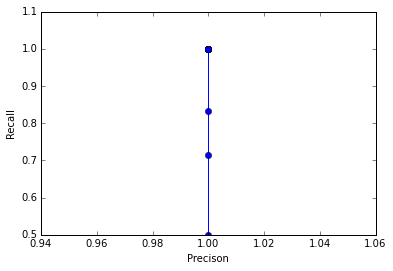

In [88]:
precClass0 = []
for i in prec:
     precClass0.append(i[0])
print precClass0

recClass0 = []
for j in rec:
    recClass0.append(j[0])
print np.sort(recClass0)

plt.plot(precClass0, np.sort(recClass0), 'bo-')
plt.xlabel("Precison")
plt.ylabel("Recall")
plt.show()

[1.0, 0.8, 0.6, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


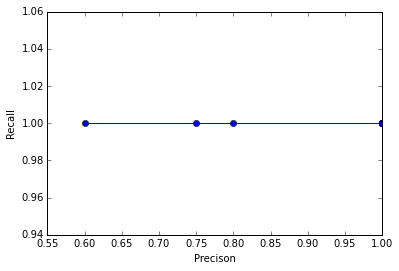

In [89]:
precClass1 = []
for i in prec:
     precClass1.append(i[1])
print precClass1

recClass1 = []
for j in rec:
    recClass1.append(j[1])
print recClass1

plt.plot(precClass1, recClass1, 'bo-')
plt.xlabel("Precison")
plt.ylabel("Recall")
plt.show()

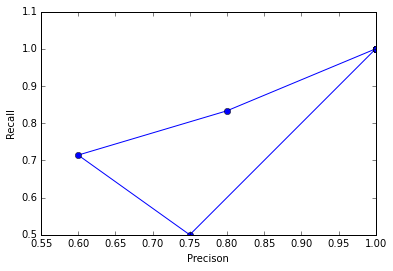

In [91]:
plt.plot(np.sort(prec), np.sort(rec), 'bo-')
plt.xlabel("Precison")
plt.ylabel("Recall")
plt.show()

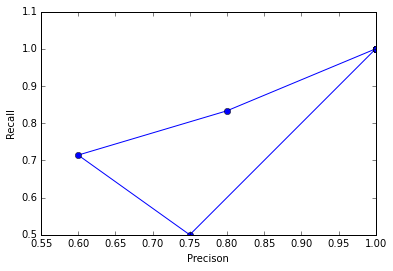

In [92]:
plt.plot(np.sort(prec), rec, 'bo-')
plt.xlabel("Precison")
plt.ylabel("Recall")
plt.show()

In [95]:
#Area under the curve
np.mean(prec)

0.95749999999999991